# Práctica 3: extracción de características

## Resources
* [A Simple & Practical Introduction To Essential Techniques Of Feature Reduction](https://medium.com/analytics-vidhya/a-simple-practical-introduction-to-essential-techniques-of-feature-reduction-db4002fd16b5)
* [Dimension Reduction Techniques with Python
](https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c)

## Recipe

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

### Principal Component Analysis (PCA)

La idea del **análisis de componentes principales** (PCA) es reducir la dimensionalidad de un conjunto de datos que consiste en un gran número de variables relacionadas, manteniendo al mismo tiempo tanta varianza en los datos como sea posible. PCA encuentra un conjunto de nuevas variables donde las variables originales son sólo sus combinaciones lineales. Las nuevas variables se denominan **componentes principales** (PC). Estos componentes principales son ortogonales: En un caso tridimensional, los componentes principales son perpendiculares entre sí. X no puede ser representado por Y o Y no puede ser presentado por Z.

La figura (A) muestra la intuición de PCA: "gira" los ejes para alinearse mejor con sus datos. El primer componente principal capturará la mayor parte de la varianza en los datos, seguido por el segundo, tercero, y así sucesivamente. Como resultado, los nuevos datos tendrán menos dimensiones.

![](https://miro.medium.com/max/371/1*d30YKpg-mAMWI3ekYM1plA.png)

In [15]:
# El conjunto de datos "iris":
file = '/home/vagrant/practicas/heart.csv'
# Cargamos el conjunto de datos en un dataframe
features=[x for x in df.columns if x!="target"]
target=["target"]

df = pd.read_csv(file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Todas las variables deben estar en la misma escala antes de aplicar PCA, de lo contrario una característica con valores grandes dominará el resultado. A continuación utilizo StandardScaler en scikit-learn para estandarizar las características del conjunto de datos en la escala de unidades (media = 0 y varianza = 1).

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


Hay 4 `features` o características en los datos originales. Así que PCA proporcionará el mismo número de componentes principales.

In [17]:
#
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-12.267345,2.873838,14.969879,6.892940,-0.072468,2.664652,0.268713,1.084704,-0.924199,0.473778,0.731103,-0.290394,0.512576
1,2.690137,-39.871374,0.877882,-10.583598,2.598773,2.460497,-0.207808,0.519390,0.194345,0.574327,0.404207,-0.425920,-0.148125
2,-42.950214,-23.636820,1.759446,-7.786655,0.436244,0.296905,-0.437425,0.514733,-0.210274,-0.619716,-0.915397,0.217828,0.079759
3,-10.944756,-28.438036,-7.044180,8.328134,0.076565,0.135460,-0.677191,0.074112,0.431605,-0.405790,0.377702,-0.246167,-0.048669
4,106.979053,-15.874468,-14.861575,3.223808,-0.242000,-0.502284,-1.188403,0.373915,0.660464,-0.147891,0.158278,0.743523,-0.060164


¿Cuáles son las varianzas de cada uno de los componentes principales?
El primer componente principal representa una variación del 92.46%, mientras que el segundo, tercero y cuarto representan una variación del 5.3%, 1.71% y 0.51%, respectivamente. Podemos decir que 92.46% + 5.3% = 97.76% de la información es captada por el primer y segundo componente principal. A menudo queremos mantener sólo las características significativas y eliminar las insignificantes. Una regla empírica es mantener los principales componentes principales que capturan la varianza significativa e ignorar los pequeños.

In [18]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([7.47564199e-01, 1.50370221e-01, 8.45968470e-02, 1.62159604e-02,
       3.84085658e-04, 2.81234229e-04, 2.28993383e-04, 9.98328415e-05,
       7.72143117e-05, 5.87402295e-05, 5.02927817e-05, 4.09679747e-05,
       3.14113086e-05])

Podemos graficar el `dataframe` usando los dos primeros componentes.

In [19]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10','PC11','PC12',"PC13",'target']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,target
0,-12.267345,2.873838,14.969879,6.892940,-0.072468,2.664652,0.268713,1.084704,-0.924199,0.473778,0.731103,-0.290394,0.512576,1
1,2.690137,-39.871374,0.877882,-10.583598,2.598773,2.460497,-0.207808,0.519390,0.194345,0.574327,0.404207,-0.425920,-0.148125,1
2,-42.950214,-23.636820,1.759446,-7.786655,0.436244,0.296905,-0.437425,0.514733,-0.210274,-0.619716,-0.915397,0.217828,0.079759,1
3,-10.944756,-28.438036,-7.044180,8.328134,0.076565,0.135460,-0.677191,0.074112,0.431605,-0.405790,0.377702,-0.246167,-0.048669,1
4,106.979053,-15.874468,-14.861575,3.223808,-0.242000,-0.502284,-1.188403,0.373915,0.660464,-0.147891,0.158278,0.743523,-0.060164,1


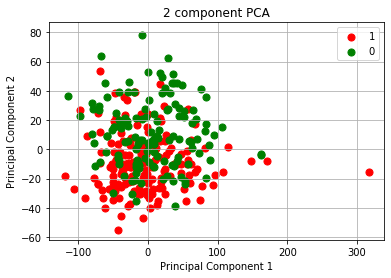

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [1, 0]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

### Kernel PCA (KPCA)

PCA aplica una **transformación lineal**, y esa también es su limitación. El Kernel PCA (KPCA) extiende PCA a la **no linealidad**. Primero mapea los datos originales a un espacio de características no lineales (normalmente de mayor dimensión), y luego aplica PCA para extraer los componentes principales de ese espacio. En la siguiente figura, el gráfico de la izquierda muestra que los puntos azules y rojos no pueden ser separados usando ninguna transformación lineal. Pero si todos los puntos se proyectan en un espacio tridimensional, ¡el resultado sí se puede separar linealmente! Entonces se aplica PCA para separar los componentes.

![](https://miro.medium.com/max/598/1*0iimd45B-RthXBoeugOKkg.png)

¿De dónde viene esta intuición? ¿Por qué la separación de componentes se hace más fácil en un espacio dimensional más alto? Esto tiene que ver con la teoría de Vapnik-Chervonenkis (VC):
> "*el mapeo en un espacio dimensional más alto, a menudo proporciona un mayor poder de clasificación*".

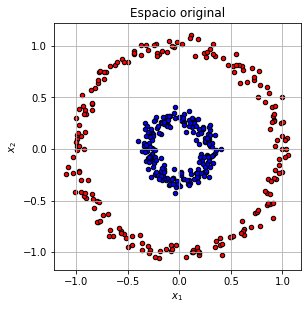

In [8]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

Sin embargo, cuando proyectamos el círculo a un espacio dimensional más alto y lo separamos usando PCA, el primer y segundo componente principal resultante son separables. A continuación se muestra el resultado de que los puntos se trazan contra el primer y segundo componente principal. Dibujo una línea para separar los puntos rojos y azules. En KPCA especificamos kernel='rbf', que es la Función Base Radial, o la distancia Euclidiana. Los RBFs se usan comúnmente como kernel en técnicas de aprendizaje automático como el Support Vector Machine (SVM).

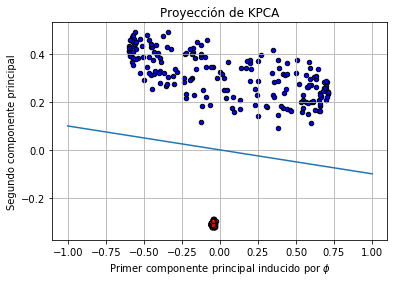

In [9]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()